# Thresholding


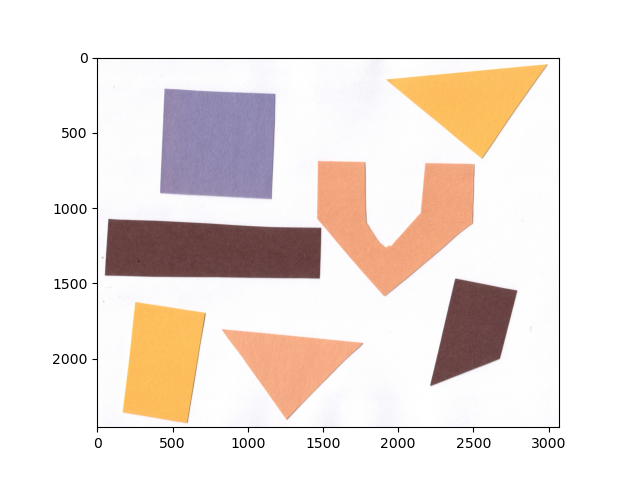

In [2]:
import glob

import imageio.v3 as iio
import ipympl
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski

%matplotlib widget

# load the image
shapes01 = iio.imread(uri="../data/raw/training/shapes-01.jpg")

fig, ax = plt.subplots()
ax.imshow(shapes01)

Convert to grayscale

## Blur to de noise it.

Rule of thumb for the sigma between the noise and the image size.
This needs to be set my a human.  
The experiment needs to be designed so that separate the noise and signal.
The noise level that is acceptable depends on what you are doing.


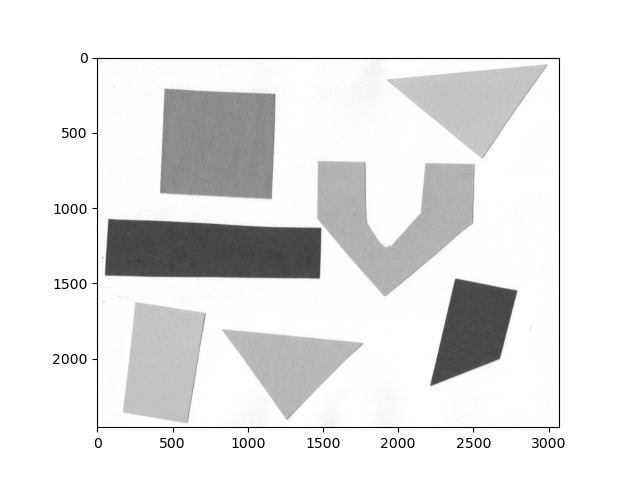

In [3]:
# convert the image to grayscale
gray_shapes = ski.color.rgb2gray(shapes01)

# blur the image to denoise, don't include noise in the histor
blurred_shapes = ski.filters.gaussian(gray_shapes, sigma=1.0)

fig, ax = plt.subplots()
ax.imshow(blurred_shapes, cmap="gray")

# create a histogram of the blurred grayscale image

(0.0, 1.0)

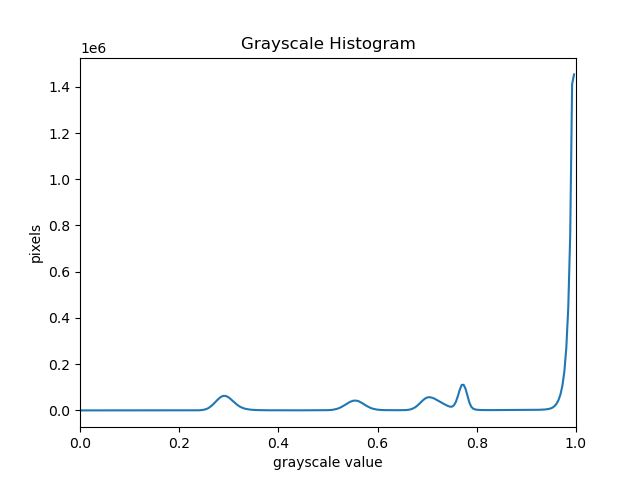

In [4]:
histogram, bin_edges = np.histogram(blurred_shapes, bins=256, range=(0.0, 1.0))

fig, ax = plt.subplots()
ax.plot(bin_edges[:-1], histogram)
ax.set_title("Grayscale Histogram")
ax.set_xlabel("grayscale value")
ax.set_ylabel("pixels")
ax.set_xlim(0, 1.0)

The threshold might be set differently if you are checking area to counting items.
Maybe lower for counting
but higher for checking the area.

Blurring the images is a good thing because it removes the noise.

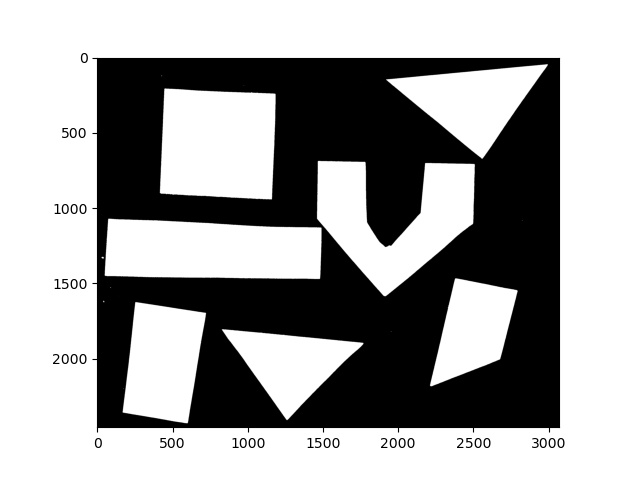

In [7]:
t = 0.8
binary_mask = blurred_shapes < t

fig, ax = plt.subplots()
ax.imshow(binary_mask, cmap="gray")

# use the binary_mask to select the "interesting" part of the image

Note the `.copy()`.
You could use np.array() like we did in the previous lessons.

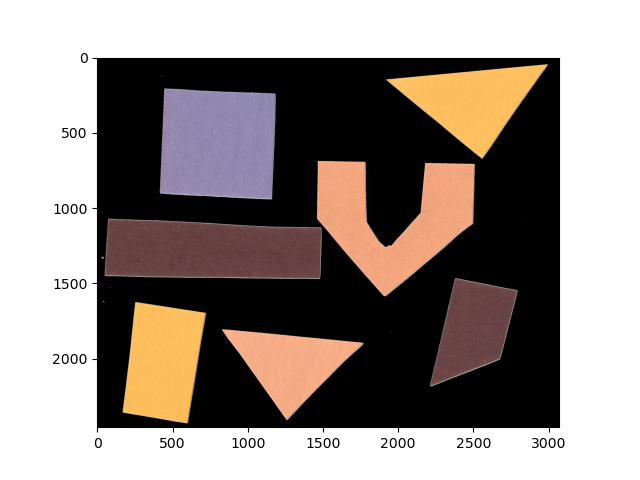

In [8]:

selection = shapes01.copy()
selection[~binary_mask] = 0

fig, ax = plt.subplots()
ax.imshow(selection)